<a href="https://colab.research.google.com/github/lfelipev/tcu-classifier/blob/master/Clusteriza%C3%A7%C3%A3o_de_Ac%C3%B3rd%C3%A3os_com_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização de Acórdãos com K-Means

Importa a biblioteca de processamento de texto e tokenização nltk

In [1]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Função que importa os arquivos CSV de Acórdãos.

In [2]:
import pandas as pd
import numpy as np

In [3]:
def read_data(filename):
    data = pd.read_csv(filename)

    for i in range(0, len(data)):
      if data['ACORDAO'].isnull()[i]:
          data['ACORDAO'][i] = data['DECISAO'][i]

    return data

In [4]:
train = read_data('acordaos.csv')
train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,KEY,TIPO,TITULO,FAVORITO,NUMACORDAO,ANOACORDAO,NUMATA,ACORDAO,ASSUNTO,COLEGIADO,DATASESSAO,DADOSMATERIAIS,DADOSRETIFICACAO,DECLARACAOVOTO,DECISAO,ENTIDADE,INTERESSADOS,MINISTROAUTORVOTOVENCEDOR,MINISTROALEGOUIMPEDIMENTOSESSAO,MINISTROREVISOR,PROC,QUORUM,RECURSOS,RELATOR,RELATORDELIBERACAORECORRIDA,RELATORIO,ADVOGADO,REPRESENTANTEMP,SITUACAO,SUMARIO,TIPOPROCESSO,UNIDADETECNICA,VOTO,VOTOCOMPLEMENTAR,VOTOMINISTROREVISOR,DTATUALIZACAO,URLARQUIVO,URLARQUIVOPDF,EXTENSAOARQUIVO
0,ACORDAO-COMPLETO-7883,DECISÃO,DECISÃO 10/2002 ATA 02/2002 - PRIMEIRA CÂMARA,False,10,2002,02/2002,"A Primeira Câmara, ante as razões expostas pel...",Recurso de Reconsideração,Primeira Câmara,05/02/2002,com 1 anexo,NaN,NaN,"A Primeira Câmara, ante as razões expostas pel...",ENTIDADE: Serviço Nacional de Aprendizagem Rur...,"RECORRENTE: Ataíde Alves, Secretário Executivo",NaN,NaN,NaN,"<a href=""https://contas.tcu.gov.br/juris/SvlPr...",NaN,NaN,WALTON ALENCAR RODRIGUES,NaN,Trata-se de Recurso de Reconsideração interpos...,NaN,NaN,OFICIALIZADO,Recurso de Reconsideração. Prestação de Contas...,PRESTAÇÃO DE CONTAS (PC),SERUR - Secretaria de Recursos,"Conheço do Recurso de Reconsideração, uma vez ...",NaN,NaN,20200327,http://www.tcu.gov.br/Consultas/Juris/Docs/jud...,http://www.tcu.gov.br/Consultas/Juris/Docs/jud...,doc
1,ACORDAO-COMPLETO-1305439,ACÓRDÃO,ACÓRDÃO 1000/2014 ATA 12/2014 - PLENÁRIO,False,1000,2014,12/2014,"Vistos, relatados e discutidos estes autos que...",NaN,Plenário,16/04/2014,NaN,NaN,NaN,NaN,Companhia Energética do Piauí.,3. Interessados/Responsáveis:3.1. Interessados...,NaN,Aroldo Cedraz.,NaN,"<a href=""https://contas.tcu.gov.br/juris/SvlPr...",13.1. Ministros presentes: Augusto Nardes (Pre...,NaN,RAIMUNDO CARREIRO,NaN,Adoto como Relatório a instrução elaborada no ...,"Mariana Araujo Becker, OAB-DF 14.675; Danilo S...",não atuou.,OFICIALIZADO,REPRESENTAÇÃO. INDEVIDA ADESÃO A ATAS DE REGIS...,REPRESENTAÇÃO (REPR),Secretaria de Controle Externo - PI (SECEX-PI).,"Preliminarmente, cumpre conhecer da presente r...",NaN,NaN,20200327,https://contas.tcu.gov.br/sagas/SvlVisualizarR...,https://contas.tcu.gov.br/sagas/SvlVisualizarR...,doc
2,ACORDAO-COMPLETO-2395663,ACÓRDÃO,ACÓRDÃO 1004/2020 ATA 13/2020 - PLENÁRIO,False,1004,2020,13/2020,"VISTOS, relatados e discutidos estes autos de ...",Processo administrativo com anteprojeto de Ins...,Plenário,22/04/2020,NaN,NaN,NaN,NaN,Tribunal de Contas da União.,3. Interessados/Responsáveis: não há.,NaN,NaN,NaN,"<a href=""https://contas.tcu.gov.br/juris/SvlPr...",13.1. Ministros presentes: José Mucio Monteiro...,NaN,VITAL DO RÊGO,NaN,"Em apreciação, proposta de instrução normativa...",não há.,não atuou.,OFICIALIZADO,DESBUROCRATIZAÇÃO. INOVAÇÕES. INSTRUÇÃO NORMAT...,ADMINISTRATIVO (ADM),não há.,"Em apreciação, proposta de instrução normativa...",NaN,NaN,20200515,https://contas.tcu.gov.br/sagas/SvlVisualizarR...,https://contas.tcu.gov.br/sagas/SvlVisualizarR...,doc
3,ACORDAO-COMPLETO-1215380,ACÓRDÃO,ACÓRDÃO 10042/2011 ATA 42/2011 - PRIMEIRA CÂMARA,False,10042,2011,42/2011,"VISTOS, relatados e discutidos os embargos de ...",NaN,Primeira Câmara,29/11/2011,NaN,NaN,NaN,NaN,Senac - Administração Regional/ES.,3. Interessados/Responsáveis:3.1. Interessados...,NaN,NaN,NaN,"<a href=""https://contas.tcu.gov.br/juris/SvlPr...",13.1. Ministros presentes: Valmir Campelo (Pre...,NaN,WALTON ALENCAR RODRIGUES,Ministro Walton Alencar Rodrigues.,Trata-se de embargos de declaração opostos por...,Walter Costa Porto (OAB/DF: 6.098); Antônio Pe...,Procurador Sergio Ricardo Costa Caribé.,OFICIALIZADO,EMBARGOS DE DECLARAÇÃO. CONHECIMENTO. REDISCUS...,PRESTAÇÃO DE CONTAS (PC),Secretaria de Controle Externo - ES (SECEX-ES).,"Conheço dos embargos, porquanto presentes os r...",NaN,NaN,20200327,https://contas.tcu.gov.br/sagas/SvlVisualizarR...,https://contas.tcu.gov.br/sagas/SvlVisualizarR...,doc
4,ACORDAO-COMPLETO-2322279,ACÓRDÃO,ACÓRDÃO 10050/2018 ATA 38/2018 - SEGUNDA CÂMARA,False,10050,2018,38/2018,"VISTOS, relatados e discutidos estes autos d

Pegamos apenas o conteúdo do texto dos Acórdãos.

In [5]:
X_train = train['ACORDAO'].values
X_train

array(['A Primeira Câmara, ante as razões expostas pelo Relator e com fundamento nos arts. 32 e 33 da Lei 8.443/92, DECIDE: 8.1. conhecer do Recurso de Reconsideração e negar-lhe provimento; e 8.2. dar ciência ao recorrente do teor desta Decisão, bem como do Relatório e Voto que a fundamentam.',
       'Vistos, relatados e discutidos estes autos que tratam de representação acerca das adesões a atas de registro de preços do Governo do Estado do Piauí, efetivadas pela Eletrobrás Distribuição Piauí (ED-PI).Acordam os Ministros do Tribunal de Contas da União, reunidos em sessão do Plenário, ante as razões expostas pelo Relator, em:9.1. acolher as razões de justificativa do Sr. Flávio Decat Moura, Sr. Luís Hiroshi Sakamoto, Sr. Valdenrique Soares Torres, Sr. Ronaldo Ferreira Braga, Sra. Izabelita de Jesus Carneiro Machado, Sra. Idiara Buenos Aires Cavalcanti, Sra. Rosemary Capuchu da Costa e da Sra. Diva Carvalho de Vasconcelos;9.2. acolher as razões de justificativas da Sra. Lídia Francisc

# Remove caracteres especiais e stopwords e coloca o texto todo em minúsculo

In [6]:
import re

In [7]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-záàâãéèêíïóôõöúçñÁÀÂÃÉÈÍÏÓÔÕÖÚÇÑ #+_]')
STOPWORDS = set(stopwords.words('portuguese'))

def text_prepare(text):
    """
        text: a string
        
        return: modified initial string
    """
    # lowercase text
    text = text.lower()

    # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = REPLACE_BY_SPACE_RE.sub(' ',text)

    # delete symbols which are in BAD_SYMBOLS_RE from text
    text = BAD_SYMBOLS_RE.sub('',text)

    # delete stopwords from text
    text = ' '.join([x for x in text.split() if not x in STOPWORDS])
    return text

In [8]:
X_train = [text_prepare(x) for x in X_train]
X_train

['primeira câmara ante razões expostas relator fundamento arts 32 33 lei 8443 92 decide 81 conhecer recurso reconsideração negarlhe provimento 82 dar ciência recorrente teor desta decisão bem relatório voto fundamentam',
 'vistos relatados discutidos autos tratam representação acerca adesões atas registro preços governo estado piauí efetivadas eletrobrás distribuição piauí edpi acordam ministros tribunal contas união reunidos sessão plenário ante razões expostas relator em91 acolher razões justificativa sr flávio decat moura sr luís hiroshi sakamoto sr valdenrique soares torres sr ronaldo ferreira braga sra izabelita jesus carneiro machado sra idiara buenos aires cavalcanti sra rosemary capuchu costa sra diva carvalho vasconcelos 92 acolher razões justificativas sra lídia francisca falcão carvalho airemoraes relação contratações ordem compra oc 1764730 contrato 173 2010 ordem compra oc 1764748 mediante adesão atas registro preços gerenciadas órgão entidade governo estado piauí 93 rejei

In [9]:
X_train[:3]

['primeira câmara ante razões expostas relator fundamento arts 32 33 lei 8443 92 decide 81 conhecer recurso reconsideração negarlhe provimento 82 dar ciência recorrente teor desta decisão bem relatório voto fundamentam',
 'vistos relatados discutidos autos tratam representação acerca adesões atas registro preços governo estado piauí efetivadas eletrobrás distribuição piauí edpi acordam ministros tribunal contas união reunidos sessão plenário ante razões expostas relator em91 acolher razões justificativa sr flávio decat moura sr luís hiroshi sakamoto sr valdenrique soares torres sr ronaldo ferreira braga sra izabelita jesus carneiro machado sra idiara buenos aires cavalcanti sra rosemary capuchu costa sra diva carvalho vasconcelos 92 acolher razões justificativas sra lídia francisca falcão carvalho airemoraes relação contratações ordem compra oc 1764730 contrato 173 2010 ordem compra oc 1764748 mediante adesão atas registro preços gerenciadas órgão entidade governo estado piauí 93 rejei

# Contador de palavras

In [10]:
# Dictionary of all words from train corpus with their counts.
words_counts = {}

all_words = [word for txt in X_train for word in txt.split()]
words_counts = {x:all_words.count(x) for x in set(all_words)}

In [11]:
words_counts

{'anexo': 204,
 '345061': 1,
 'aoestabelecimento': 1,
 '00188': 1,
 'encaminharse': 3,
 'cristiano': 7,
 'lucideane': 1,
 'saques': 1,
 '2007tcu2': 3,
 '2009ordinária': 2,
 'zele': 1,
 '489706': 1,
 'tornandose': 1,
 'aproximem': 1,
 'requisitos9241': 1,
 'atendem': 2,
 '02903': 1,
 '453367': 1,
 'tcm': 1,
 'eireli': 13,
 '20035': 3,
 'aumentando': 1,
 'andrew': 1,
 'dodge': 1,
 'dallorto': 2,
 'doembargante': 1,
 'correta': 38,
 'ocorra': 22,
 'intempestividade': 4,
 'amparado': 2,
 'voltada': 3,
 'prerrogativas': 2,
 '546008622': 1,
 'morar': 2,
 'desempenhada': 2,
 'extensão': 15,
 '394902': 1,
 'comprovadas': 4,
 'ratificadas': 4,
 '1994tcuplenário': 2,
 'pessoas': 51,
 'dividindoos': 1,
 '7316': 1,
 'iniciativa': 10,
 'guarda': 15,
 'verificar9241': 1,
 'conhecido': 2,
 '874684': 1,
 '7449586': 1,
 'digna': 2,
 'inadimplentes': 3,
 '470518': 2,
 'convocação': 8,
 'reputada': 1,
 'disciplinará': 1,
 '13010': 1,
 '268276': 1,
 '345540': 1,
 'bemquerer': 17,
 '588334unidade': 1,
 're

In [12]:
DICT_SIZE = 25000
WORDS_TO_INDEX = {j[0]:i for i, j in enumerate(sorted(words_counts.items(),
                                                      key=lambda x: x[1],
                                                      reverse=True )[:DICT_SIZE]
                                               )}
INDEX_TO_WORDS = {v: k for k, v in WORDS_TO_INDEX.items()}
ALL_WORDS = WORDS_TO_INDEX.keys()

def my_bag_of_words(text, words_to_index, dict_size):
    """
        text: a string
        dict_size: size of the dictionary
        
        return a vector which is a bag-of-words representation of 'text'
    """
    result_vector = np.zeros(dict_size)

    for word in text.split():
      if word in words_to_index.keys():
        result_vector[words_to_index[word]] += 1
    return result_vector

# Cria uma bag of words.

In [13]:
from scipy import sparse as sp_sparse

In [14]:
X_train_mybag = sp_sparse.vstack([sp_sparse.csr_matrix(my_bag_of_words(text, WORDS_TO_INDEX, DICT_SIZE)) for text in X_train])
print('X_train shape ', X_train_mybag.shape)

X_train shape  (1199, 25000)


In [15]:
row = X_train_mybag[10].toarray()[0]
non_zero_elements_count = len(row[np.nonzero(row)])

#### TF-IDF

The second approach extends the bag-of-words framework by taking into account total frequencies of words in the corpora. It helps to penalize too frequent words and provide better features space.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
def tfidf_features(X_train):
    """
        X_train, X_val, X_test — samples        
        return TF-IDF vectorized representation of each sample and vocabulary
    """
    # Create TF-IDF vectorizer with a proper parameters choice
    tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), min_df=5, max_df=0.9)
    
    # Fit the vectorizer on the train set
    tfidf_vectorizer.fit(X_train)
    # Transform the train, test, and val sets and return the result
    X_train_tf = tfidf_vectorizer.transform(X_train) #could have used .fit_transform 

    return X_train_tf, tfidf_vectorizer.vocabulary_, tfidf_vectorizer

In [18]:
X_train_tfidf, tfidf_vocab, tf_idf_vectorizor = tfidf_features(X_train)
tfidf_reversed_vocab = {i:word for word,i in tfidf_vocab.items()}

In [19]:
X_train_tfidf_array = X_train_tfidf.toarray()

# Utilizando PCA para reduzir a dimensão do vetor TF-IDF e utilizando a regra do cotovelo para predizer as classes

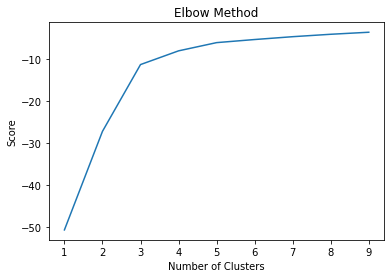

In [20]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_train_tfidf_array)

number_clusters = range(1, 10)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()


# Fazendo clusterização dos acórdãos e salvando em um novo dataframe

In [21]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(X_train_tfidf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'auto')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

dfs = get_top_features_cluster(X_train_tfidf_array, prediction, 15)

# Plotanto as principais palavras de cada cluster

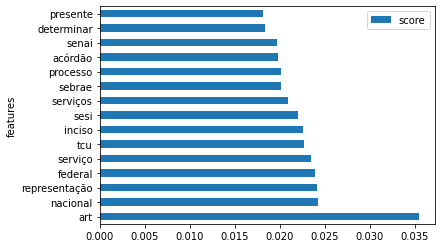

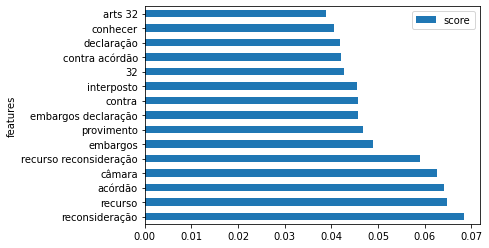

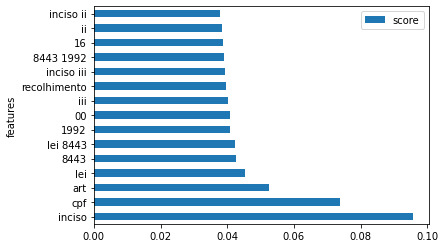

In [22]:
for i in range(0, len(dfs)):
    ax = dfs[i].plot.barh(x='features', y='score', rot=0)

In [23]:
# Gerando novo dataframe com as labels dos clusters encontrados

In [24]:
print(len(kmeans.labels_))
print(kmeans.labels_)
df_clusterizado = train.copy()
df_clusterizado['cluster'] = kmeans.labels_

1199
[1 2 0 ... 0 1 0]


In [25]:
i = 4
print(df_clusterizado['cluster'][i], df_clusterizado['ACORDAO'][i]) 

0 VISTOS, relatados e discutidos estes autos de representação, com pedido de cautelar suspensiva, formulada pela Geprix Service – Gestão e Facilities Ltda. sobre possíveis irregularidades no Pregão Eletrônico nº 150/2018 conduzido pelo Departamento Regional do Serviço Social da Indústria no Estado de São Paulo (Sesi-SP) para a contratação de prestação de serviços continuados de portaria, jardinagem, limpeza e conservação, com o fornecimento de mão-de-obra, materiais e equipamentos, em prol das unidades CAT em Laerte Michielin – Araras, Olavo Egydio Setúbal – Cotia e Escola Sesi de Pirassununga sob o valor total estimado de R$ 145.825,21 ao mês;ACORDAM os Ministros do Tribunal de Contas da União, reunidos em Sessão da 2ª Câmara, ante as razões expostas pelo Relator, em: 9.1. conhecer da presente representação, por atender aos requisitos de admissibilidade previstos nos arts. 235 e 237, I, do RITCU, para, no mérito, considera-la parcialmente procedente, diante dos elementos de convicção 

# KNN - Parte 1: Descobrindo o melhor valor de K

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

X = X_train_tfidf_array
y = df_clusterizado['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores

In [27]:
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

<Figure size 432x288 with 0 Axes>

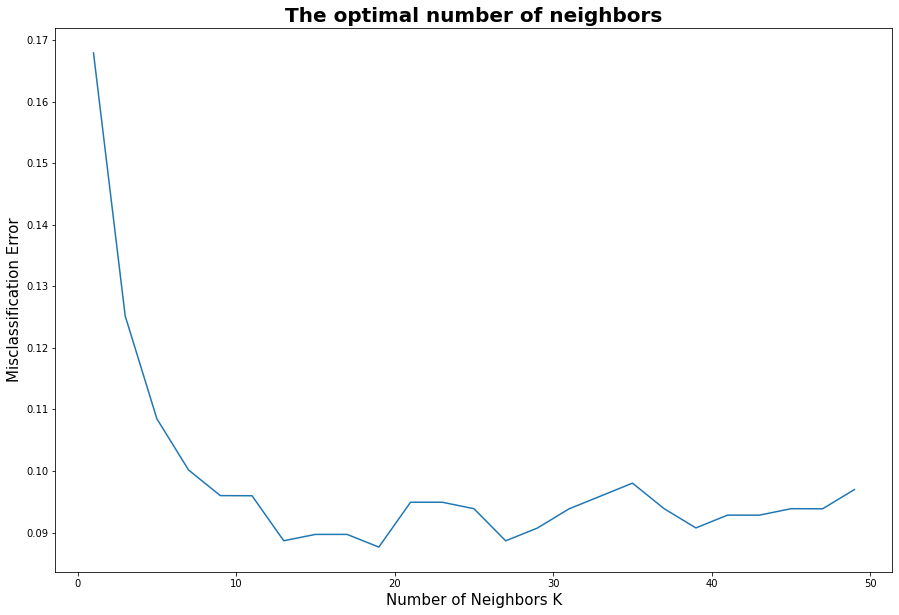

The optimal number of neighbors is 19.


In [28]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
plt.plot(k_list, MSE)

plt.show()
# finding best k
best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

# Realizando o KNN com o melhor K obtido na célula anterior

In [29]:
X = X_train_tfidf_array
y = df_clusterizado['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Fitting clasifier to the Training set
# Loading libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=19)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [30]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 95.0 %.
